**NOTE:** This notebook is run on Kaggle. Therefore, the outputs in this notebook may not be properly rendered. Additionally, some elements in the code will be specific only to Kaggle (HF tokens, Kaggle initialisations, etc.). These may error out on other environments. It is recommended to run this notebook on an environment with CUDA installed.

# Initialisation

## Kaggle initialisations

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/da5401-2025-data-challenge/test_data.json
/kaggle/input/da5401-2025-data-challenge/sample_submission.csv
/kaggle/input/da5401-2025-data-challenge/train_data.json
/kaggle/input/da5401-2025-data-challenge/metric_names.json
/kaggle/input/da5401-2025-data-challenge/metric_name_embeddings.npy


## Installations

In [2]:
!pip install -U -q sentence-transformers git+https://github.com/huggingface/transformers@v4.56.0-Embedding-Gemma-preview

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.0/488.0 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 4.2 MB/s eta 0:00:000:00:0100

## HuggingFace Token

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("HF_TOKEN")

In [4]:
from huggingface_hub import login
login(token=secret_value_0)

## Gemma initialisation

In [5]:
import torch
from sentence_transformers import SentenceTransformer

device = "cuda" if torch.cuda.is_available() else "cpu"

model_id = "google/embeddinggemma-300M"
model = SentenceTransformer(model_id).to(device=device)

print(f"Device: {model.device}")
print(model)
print("Total number of parameters in the model:", sum([p.numel() for _, p in model.named_parameters()]))

2025-11-18 16:15:52.521752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763482552.765775      39 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763482552.840413      39 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/573 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/997 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/58.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/312 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/9.44M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

3_Dense/model.safetensors:   0%|          | 0.00/9.44M [00:00<?, ?B/s]

Device: cuda:0
SentenceTransformer(
  (0): Transformer({'max_seq_length': 2048, 'do_lower_case': False, 'architecture': 'Gemma3TextModel'})
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Dense({'in_features': 768, 'out_features': 3072, 'bias': False, 'activation_function': 'torch.nn.modules.linear.Identity'})
  (3): Dense({'in_features': 3072, 'out_features': 768, 'bias': False, 'activation_function': 'torch.nn.modules.linear.Identity'})
  (4): Normalize()
)
Total number of parameters in the model: 307581696


## Data loading

In [6]:
import json

with open("/kaggle/input/da5401-2025-data-challenge/train_data.json", "r") as f:
    data = json.load(f)

with open("/kaggle/input/da5401-2025-data-challenge/test_data.json", "r") as f:
    test_data = json.load(f)

with open("/kaggle/input/da5401-2025-data-challenge/metric_names.json", "r") as m:
    met_names = json.load(m)

met_emb = np.load("/kaggle/input/da5401-2025-data-challenge/metric_name_embeddings.npy")

## Checking data formats

In [7]:
data[1000]

{'metric_name': 'transparency/attribution_to_sources',
 'score': '9.0',
 'user_prompt': 'मेरे धान की फसल की निचली पत्तियां पीली पड़ रही हैं और बाद में भूरी होकर सूख रही हैं। मुझे लगता है कि यह किसी पोषक तत्व की कमी है। आप मुझे बताएं कि आपने यह किस आधार पर बताया है और मैं इस बारे में और जानकारी कहाँ से प्राप्त कर सकता हूँ ताकि सही उपचार कर सकूँ?',
 'response': 'धान की निचली पत्तियों का पीला पड़ना और फिर सूखना आमतौर पर नाइट्रोजन या फास्फोरस की कमी के लक्षण हो सकते हैं, हालांकि अन्य पोषक तत्वों की कमी या रोग भी इसका कारण हो सकते हैं। यह जानकारी भारतीय मृदा विज्ञान संस्थान (ICAR-Indian Institute of Soil Science), भोपाल और अखिल भारतीय समन्वित अनुसंधान परियोजना (AICRP) की मृदा विज्ञान पर प्रकाशित रिपोर्टों से ली गई है। मिट्टी की सटीक जांच और पोषक तत्व प्रबंधन के बारे में अधिक जानकारी आप ICAR-Indian Institute of Soil Science (iiss.icar.gov.in) की वेबसाइट और अपने क्षेत्र के कृषि विश्वविद्यालय के मृदा विज्ञान विभाग से प्राप्त कर सकते हैं। सटीक निदान के लिए अपनी मिट्टी और प्रभावित पौधों का प्रयो

In [8]:
met_names = np.array(met_names)
met_names.shape

(145,)

In [9]:
met_emb.shape

(145, 768)

# Setup

## Mapping and trial embedding

In [10]:
met = data[1000]["metric_name"]
met

'transparency/attribution_to_sources'

In [11]:
data_met_emb = met_emb[np.argmax([met_names == met]), :]

In [12]:
prompt = data[1000]["user_prompt"]
prompt_emb = model.encode(prompt)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
response = data[1000]["response"]
response_emb = model.encode(response)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

## Extracting from JSONs

In [14]:
import numpy as np
from sentence_transformers import SentenceTransformer

met_emb_idx = []
prompts_lst = []
sys_prompts_lst = []
responses_lst = []
scores_lst = []

for d in data:
    met_emb_idx += [met_emb[np.argmax([met_names == d["metric_name"]]), :]]
    prompts_lst += [d["user_prompt"]]
    sp = "0" if d["system_prompt"] is None else d["system_prompt"]
    sys_prompts_lst += [sp]
    responses_lst += [d["response"]]
    score = int(d["score"].split(".")[0])
    score += 1 if int(d["score"].split(".")[1]) > 0 else 0
    scores_lst += [score]

test_met_emb_idx = []
test_prompts_lst = []
test_sys_prompts_lst = []
test_responses_lst = []
for t in test_data:
    test_met_emb_idx += [met_emb[np.argmax([met_names == t["metric_name"]]), :]]
    test_prompts_lst += [t["user_prompt"]]
    test_sp = "0" if t["system_prompt"] is None else t["system_prompt"]
    test_sys_prompts_lst += [test_sp]
    test_responses_lst += [t["response"]]

## Getting Embeddings from Gemma

In [15]:
met_emb_idx = np.array(met_emb_idx)

# Batch encode prompts & responses
prompt_emb = model.encode(prompts_lst, batch_size=20, show_progress_bar=True)      # (n_samples, dim)
response_emb = model.encode(responses_lst, batch_size=20, show_progress_bar=True)  # (n_samples, dim)
sys_prompt_emb = model.encode(sys_prompts_lst, batch_size=20, show_progress_bar=True)  # (n_samples, dim)

# Final matrix: (dim, 4, n_samples)
X = np.stack([met_emb_idx, sys_prompt_emb, prompt_emb, response_emb], axis=1)  # Shape: (n_samples, 4, dim)
X = X.transpose(2, 1, 0)  # Shape: (dim, 4, n_samples)
y = np.array(scores_lst)

print(f"Matrix ready: {X.shape}")
print(f"Scores ready: {y.shape}")

Batches:   0%|          | 0/250 [00:00<?, ?it/s]

Batches:   0%|          | 0/250 [00:00<?, ?it/s]

Batches:   0%|          | 0/250 [00:00<?, ?it/s]

Matrix ready: (768, 4, 5000)
Scores ready: (5000,)


In [16]:
test_met_emb_idx = np.array(test_met_emb_idx)

# Batch encode prompts & responses
test_prompt_emb = model.encode(test_prompts_lst, batch_size=20, show_progress_bar=True)      # (n_samples, dim)
test_response_emb = model.encode(test_responses_lst, batch_size=20, show_progress_bar=True)  # (n_samples, dim)
test_sys_prompt_emb = model.encode(test_sys_prompts_lst, batch_size=20, show_progress_bar=True)  # (n_samples, dim)

# Final matrix: (dim, 3, n_samples)
X_test = np.stack([test_met_emb_idx, test_sys_prompt_emb, test_prompt_emb, test_response_emb], axis=1)  # Shape: (n_samples, 4, dim) -> transpose if needed
X_test = X_test.transpose(2, 1, 0)  # Now (dim, 4, n_samples)

print(f"Matrix ready: {X_test.shape}")

Batches:   0%|          | 0/182 [00:00<?, ?it/s]

Batches:   0%|          | 0/182 [00:00<?, ?it/s]

Batches:   0%|          | 0/182 [00:00<?, ?it/s]

Matrix ready: (768, 4, 3638)


## Visualisation

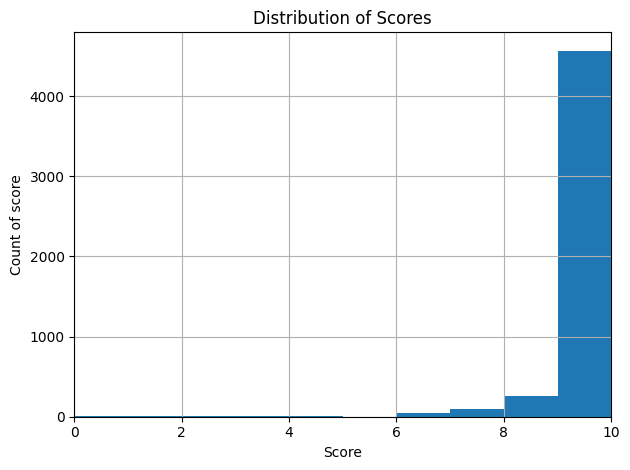

In [17]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Count of score")
plt.grid()
plt.xlim(0, 10)
plt.ylim(0)
plt.tight_layout()

/tmp/ipykernel_39/1801218712.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0)


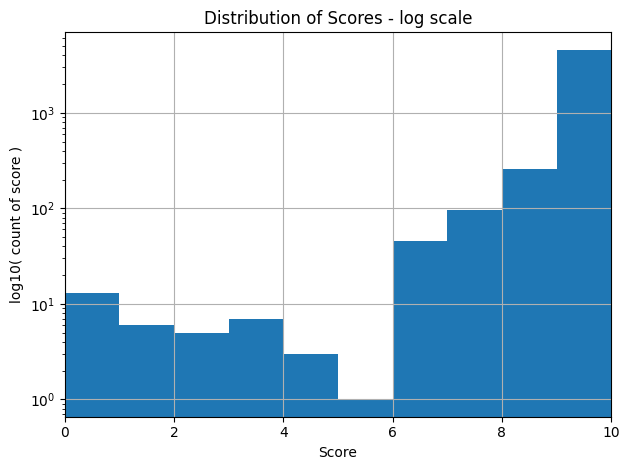

In [18]:
import matplotlib.pyplot as plt
plt.hist(y)
plt.title("Distribution of Scores - log scale")
plt.xlabel("Score")
plt.ylabel("log10( count of score )")
plt.grid()
plt.yscale("log")
plt.xlim(0, 10)
plt.ylim(0)
plt.tight_layout()

# Idea

Create a matrix where we combine 4 things:
1. metric name embedding - extracted
2. system prompt embedding - generated
3. user prompt embedding - generated
4. response embedding - generated

the resultant matrix is of shape (embedding shape, 4 embeddings, n datapoints)

Using the same resultant matrix flatten the data into 2 sets:

1. embeddings shape * 3 embeddings (system prompt, user prompt and response), n datapoints
2. embeddings shape * 1 embedding (metric name), n datapoints

Apply self attention layers separately on both. Then apply cross attention across both (metric as KV for prompt-response query). Then have a few self attention layers and finally a pooled embedding output for metric-tuned distances.

# Implementation

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import accuracy_score, f1_score
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import DataLoader, TensorDataset, random_split

os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [20]:
X.shape, y.shape

((768, 4, 5000), (5000,))

In [21]:
X_test.shape

(768, 4, 3638)

In [22]:
del new_model
del optimizer


NameError: name 'new_model' is not defined

## Loss functions

In [23]:
class FocalLoss(nn.Module):
    # Used for classification problem formulation
    def __init__(self, alpha=0.8, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce = nn.CrossEntropyLoss(reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        return loss
        
class TripletHingeLoss(nn.Module):
    # Used for metric learning formulation
    def __init__(self, margin=1.0):
        super().__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        dist_pos = (anchor - positive).pow(2).sum(1)
        dist_neg = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(dist_pos - dist_neg + self.margin)
        return losses.mean()

class WeightedHuberLoss(nn.Module):
    # Used for regression formulation
    def __init__(self, delta=1.0):
        super().__init__()
        self.huber = nn.HuberLoss(delta=delta, reduction='none')

    def forward(self, outputs, targets):
        outputs = outputs.view(-1)
        targets = targets.view(-1)

        # Give higher weight if target < 5
        weights = torch.where(targets <= 5, 4.0, 1.0)

        # per-sample huber loss
        per_sample = self.huber(outputs, targets)

        # weighted mean loss
        loss = (per_sample * weights).sum() / weights.sum()

        return loss

## Attention Block

In [24]:
class CrossAttentionBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.norm_q1 = nn.LayerNorm(embed_dim)
        self.mha = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.drop_attn = nn.Dropout(dropout)
        
        self.norm_ff = nn.LayerNorm(embed_dim)
        ff_dim = embed_dim * 4
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, embed_dim),
        )
        self.drop_ff = nn.Dropout(dropout)

    def forward(self, q, kv):
        x = self.norm_q1(q)
        attn, _ = self.mha(x, kv, kv)
        q = q + self.drop_attn(attn)
        
        x = self.norm_ff(q)
        ff = self.ffn(x)
        q = q + self.drop_ff(ff)
        return q

## Model Architecture

In [25]:
class AttentionModel(nn.Module):
    def __init__(self, embed_dim, num_heads=8, num_self_layers=3, num_cross_layers=2, num_final_layers=3, dropout=0.1):
        super().__init__()
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=embed_dim * 4,
            dropout=dropout,
            activation='gelu',
            batch_first=True,
            norm_first=True
        )
        
        self.self_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_self_layers)
        self.final_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_final_layers)
        
        self.cross_blocks = nn.ModuleList([
            CrossAttentionBlock(embed_dim, num_heads, dropout)
            for _ in range(num_cross_layers)
        ])

    def forward(self, x):
        m  = x[:, :1, :]
        pr = x[:, 1:, :]

        pr = self.self_encoder(pr)
        m  = self.self_encoder(m)

        combined = pr
        for block in self.cross_blocks:
            combined = block(combined, m)

        combined = self.final_encoder(combined)
        pooled = combined.mean(dim=1)
        return pooled

In [26]:
new_model = AttentionModel(embed_dim=X.shape[0], num_heads=16, 
                           num_self_layers=12, num_cross_layers=8, 
                           num_final_layers=4, dropout=0.4)
new_model

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


AttentionModel(
  (self_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (linear1): Linear(in_features=768, out_features=3072, bias=True)
        (dropout): Dropout(p=0.4, inplace=False)
        (linear2): Linear(in_features=3072, out_features=768, bias=True)
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.4, inplace=False)
        (dropout2): Dropout(p=0.4, inplace=False)
      )
    )
  )
  (final_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (lin

# Training

## train and test Functions

In [27]:
# Print these over MSE/MAE for val; optimize on spearman for comp LB.
def train(model: nn.Module, 
          X: torch.Tensor, 
          y: torch.Tensor, 
          optimizer: torch.optim.Optimizer, 
          loss_fn: nn.Module, 
          scheduler: torch.optim.lr_scheduler._LRScheduler, 
          epochs: int = 100, 
          batch_size: int = 64,
          val_split: float = 0.2,
          device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
          clip_value: float = 1.0,
          patience: int = 10,
          seed: int = 42) -> dict:
    torch.manual_seed(seed)
    model.to(device)
    
    X = X.float().permute(2, 1, 0)
    y = y.float()
    
    indices = torch.argsort(y)
    low_idx = indices[:len(indices)//2]
    high_idx = indices[len(indices)//2:]
    
    dataset = TensorDataset(X, y)
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    train_ds, val_ds = random_split(dataset, [train_size, val_size])
    
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
    
    best_val_loss = float('inf')
    patience_counter = 0
    history = {'train_loss': [], 'val_loss': []}
    
    for epoch in range(epochs):
        model.train()
        train_losses = []
        for batch in train_loader:
            inputs, targets = batch[0].to(device), batch[1].to(device)
            emb = model(inputs)
            size = len(emb) // 3
            anchor = emb[:size]
            positive = emb[size:2*size]
            negative = emb[2*size:3*size]
            if size == 0: continue
            loss = loss_fn(anchor, positive, negative)
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
            optimizer.step()
            train_losses.append(loss.item())
        
        if not train_losses: continue  # No valid batches
        avg_train_loss = sum(train_losses) / len(train_losses)
        history['train_loss'].append(avg_train_loss)
        scheduler.step()
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f}")
        if (epoch + 1) % 5 == 0:
            val_loss = evaluate(model, val_loader, loss_fn, device)['loss']
            history['val_loss'].append(val_loss)
            
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {val_loss:.4f}")
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                torch.save(model.state_dict(), 'best_model.pth')
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break
    return history

def evaluate(model: nn.Module, 
             loader: DataLoader, 
             loss_fn: nn.Module, 
             device: torch.device) -> dict:
    model.eval()
    all_losses = []
    with torch.no_grad():
        for batch in loader:
            inputs = batch[0].to(device)
            targets = batch[1].to(device)
            emb = model(inputs)
            size = len(emb) // 3
            anchor = emb[:size]
            positive = emb[size:2*size]
            negative = emb[2*size:3*size]
            if size == 0: continue
            loss = loss_fn(anchor, positive, negative)
            all_losses.append(loss.item())
    result = {'loss': sum(all_losses) / len(all_losses) if all_losses else float('inf')}
    return result

def test(model: nn.Module, 
         X_test: torch.Tensor, 
         batch_size: int = 128,
         device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')) -> torch.Tensor:
    model.load_state_dict(torch.load('best_model.pth'))
    X_test = X_test.float().permute(2, 1, 0)
    test_ds = TensorDataset(X_test)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
    model.eval()
    all_emb = []
    with torch.no_grad():
        for batch in test_loader:
            inputs = batch[0].to(device)
            emb = model(inputs)
            all_emb.append(emb.cpu())
    return torch.cat(all_emb, dim=0)


## Setup

In [28]:
# Setup
optimizer = torch.optim.AdamW(new_model.parameters(), lr=1e-3, weight_decay=0.05)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=11, T_mult=2, eta_min=1e-6)
loss_fn = TripletHingeLoss(margin=1.0)

## Model training

In [29]:
history = train(new_model, torch.tensor(X), torch.tensor(y), optimizer, loss_fn, scheduler, epochs=200, 
                batch_size=256, val_split=0.10, device="cuda", patience=50)

Epoch 1/200 | Train Loss: 20684.3538
Epoch 2/200 | Train Loss: 31101.5983
Epoch 3/200 | Train Loss: 32715.9903
Epoch 4/200 | Train Loss: 32694.3977
Epoch 5/200 | Train Loss: 33224.1292
Epoch 5/200 | Train Loss: 33224.1292 | Val Loss: 4104.3004
Epoch 6/200 | Train Loss: 25572.2967
Epoch 7/200 | Train Loss: 23725.7620
Epoch 8/200 | Train Loss: 19335.7814
Epoch 9/200 | Train Loss: 14923.1558
Epoch 10/200 | Train Loss: 13662.3556
Epoch 10/200 | Train Loss: 13662.3556 | Val Loss: 1242.5682
Epoch 11/200 | Train Loss: 11968.6701
Epoch 12/200 | Train Loss: 17778.8012
Epoch 13/200 | Train Loss: 29464.6852
Epoch 14/200 | Train Loss: 40368.2119
Epoch 15/200 | Train Loss: 40848.7030
Epoch 15/200 | Train Loss: 40848.7030 | Val Loss: 3953.4829
Epoch 16/200 | Train Loss: 44578.1330
Epoch 17/200 | Train Loss: 46861.5241
Epoch 18/200 | Train Loss: 42795.9219
Epoch 19/200 | Train Loss: 47766.8937
Epoch 20/200 | Train Loss: 41891.1249
Epoch 20/200 | Train Loss: 41891.1249 | Val Loss: 3479.5510
Epoch 21/2

## Loss Visualisation

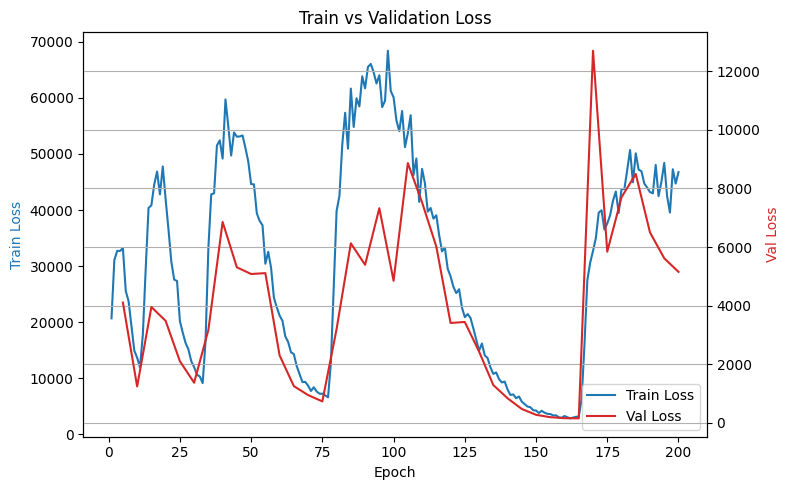

In [42]:
import matplotlib.pyplot as plt
import numpy as np

train_loss = history["train_loss"]
val_loss = history["val_loss"]

epochs_train = np.arange(1, len(train_loss) + 1)
epochs_val = np.arange(5, 5 * len(val_loss) + 1, 5)

fig, ax1 = plt.subplots(figsize=(8, 5))

# Train loss
ax1.plot(epochs_train, train_loss, color="tab:blue", label="Train Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Train Loss", color="tab:blue")
ax1.tick_params(axis="y")

# Val loss
ax2 = ax1.twinx()
ax2.plot(epochs_val, val_loss, color="tab:red", label="Val Loss")
ax2.set_ylabel("Val Loss", color="tab:red")
ax2.tick_params(axis="y")

# Combine legends
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="lower right")

plt.title("Train vs Validation Loss")
plt.tight_layout()
plt.grid()

# Evaluation

## Inference

In [43]:
x_hat_train = test(new_model, torch.tensor(X), batch_size=128)
x_hat_test = test(new_model, torch.tensor(X_test), batch_size=128)

## Regression for output

In [44]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.005).fit(x_hat_train.cpu().numpy(), y)
scores = reg.predict(x_hat_test.cpu().numpy())  # Crush outliers
# Sub as int(scores) if discrete.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.90807e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Test outputs

In [45]:
rng = list(range(1, len(x_hat_test)+1))
output = pd.DataFrame(zip(rng, scores-3), columns=["ID", "score"])
output.describe()

,ID,score
count,3638.000000,3638.000000
mean,1819.500000,6.129084
std,1050.344467,0.566067
min,1.000000,3.165253
25%,910.250000,5.792633
50%,1819.500000,6.159378
75%,2728.750000,6.511742
max,3638.000000,7.884277


In [46]:
output.to_csv("output.csv", index=False)